In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [30]:
import cv2, matplotlib.pyplot as plt, os

In [2]:
from ultralytics import YOLO

# upload the model weights from github
# load the model
model = YOLO('/content/best_obb.pt')

In [33]:
# inferencing
res_00 = model.predict('/content/Untitled.jpeg', save=True, conf=0.25, verbose=True)


image 1/1 /content/Untitled.jpeg: 640x640 416.4ms
Speed: 4.3ms preprocess, 416.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/obb/predict


In [39]:
import os
# extracting oriented bounding box 4 points

# for single image detection
xyxyxyxy = res_00[0].obb[0].xyxyxyxy.squeeze()

x1, y1 = xyxyxyxy[0][0], xyxyxyxy[0][1]
x2, y2 = xyxyxyxy[1][0], xyxyxyxy[1][1]
x3, y3 = xyxyxyxy[2][0], xyxyxyxy[2][1]
x4, y4 = xyxyxyxy[3][0], xyxyxyxy[3][1]

print(f"x1 :{x1}",f"y1 :{y1}")
print(f"x2 :{x2}",f"y2 :{y2}")
print(f"x3 :{x3}",f"y3 :{y3}")
print(f"x4 :{x4}",f"y4 :{y4}")



x1 :118.9207763671875 y1 :112.10400390625
x2 :120.33750915527344 y2 :31.331012725830078
x3 :36.20689392089844 y3 :29.85538101196289
x4 :34.7901611328125 y4 :110.62837219238281


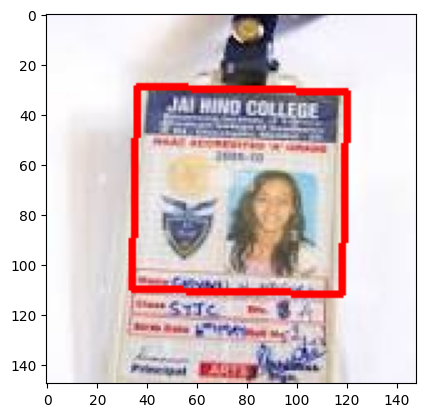

In [43]:
img = cv2.imread('/content/Untitled.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pt1 = (int(xyxyxyxy[0][0]), int(xyxyxyxy[0][1]))
pt2 = (int(xyxyxyxy[1][0]), int(xyxyxyxy[1][1]))
pt3 = (int(xyxyxyxy[2][0]), int(xyxyxyxy[2][1]))
pt4 = (int(xyxyxyxy[3][0]), int(xyxyxyxy[3][1]))

cv2.line(img, pt1, pt2, (255, 0, 0), 2)
cv2.line(img, pt2, pt3, (255, 0, 0), 2)
cv2.line(img, pt3, pt4, (255, 0, 0), 2)
cv2.line(img, pt4, pt1, (255, 0, 0), 2)


plt.imshow(img)

In [7]:
import cv2, matplotlib.pyplot as plt

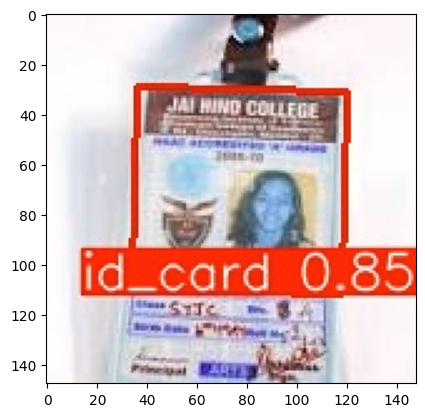

In [12]:
img = cv2.imread('/content/runs/obb/predict/Untitled.jpeg')

plt.imshow(img)
